In [72]:
import pandas as pd
import numpy as np
# Графика
import matplotlib.pyplot as plt
import seaborn as sns
# Деление выборки
from sklearn import model_selection

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble # онсамбли

from sklearn import metrics #метрики

In [42]:
weather_data = pd.read_csv('../../data/weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


* Date — дата, в которую зафиксировано наблюдение;
* Location — местонахождение метеорологической станции;
* MinTemp — минимальная температура (℃);
* MaxTemp — максимальная температура (℃);
* Rainfall — количество осадков (дождь) за сутки (мм);
* Evaporation — количество испарений до 9 утра (мм);
* Sunshine — количество часов в сутках, когда светило солнце;
* WindGustDir — направление самого сильного порыва ветра за последние 24 часа;
* WindGustSpeed — скорость самого сильного порыва ветра за последние 24 часа;
* WindDir9am — направление ветра в 9 утра;
* WindDir3pm — направление ветра в 3 часа дня;
* WindSpeed9am — скорость ветра в 9 часов утра;
* WindSpeed3pm — скорость ветра в 3 часа дня;
* Humidity9am — влажность в 9 утра;
* Humidity3pm — влажность в 3 часа дня;
* Pressure9am — атмосферное давление в 9 утра;
* Pressure3pm — атмосферное давление в 3 часа дня;
* Cloud9am — часть неба, закрытая облаками, в 9 утра;
* Cloud3pm — часть неба, закрытая облаками, в 3 часа дня;
* Temp9am — температура в 9 утра;
* Temp3pm — температура в 3 часа дня;
* RainToday — наличие дождя в этот день;
* RainTomorrow — наличие дождя на следующий день.

In [43]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Задание 4.1
Сколько суммарно пропусков в данных?

In [44]:
print(weather_data.isnull().sum().sum(),': суммарно пропусков в данных')

343248 : суммарно пропусков в данных


### Задание 4.2
В некоторых признаках пропусков более 40 % — удалите такие признаки. Сколько их было?

In [45]:
i=weather_data.shape[1]
a=weather_data.isnull().mean()*100>40
for key, val in a.items():
    if val: weather_data = weather_data.drop(key, axis=1)
    
i -= weather_data.shape[1]
print(f'В {i} признаках было пропусков более 40 %')

В 3 признаках было пропусков более 40 %


### Задание 4.3
Теперь обработаем признаки RainToday и RainTomorrow таким образом, чтобы вместо yes было значение 1, а вместо no — значение 0. Обратите внимание на то, что в признаках RainToday и RainTomorrow присутствуют пропуски, и их трогать не нужно, они должны остаться пропусками. Поэтому обрабатывайте столбцы таким образом, чтобы не видоизменить пропущенные значения.

Вычислите среднее арифметическое для преобразованного признака RainToday и запишите его в ответ, предварительно округлив до двух знаков после точки-разделителя.

```python
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
```

In [46]:
# weather_data['RainToday']=weather_data[(weather_data['RainToday']=='No')|(weather_data['RainToday']=='Yes')]['RainToday'].apply(lambda x: 1 if x=="Yes" else 0)
weather_data['RainToday']=weather_data['RainToday'].apply(lambda x: 1 if x=="Yes" else 0 if x=='No' else x)
weather_data['RainTomorrow']=weather_data['RainTomorrow'].apply(lambda x: 1 if x=="Yes" else 0 if x=='No' else x)

print('среднее арифметическое для преобразованного признака RainToday = {:.2f}'.format(weather_data['RainToday'].mean()))

среднее арифметическое для преобразованного признака RainToday = 0.22


### Задание 4.4
Обработайте признак Date таким образом, чтобы выделить в отдельный признак Month (номер месяца). Изначальный признак Date удалите. Определите, какой месяц имеет самую большую часть дождливых дней относительно всех дней месяца. В качестве ответа введите порядковый номер месяца.

In [47]:
weather_data['Date']=pd.to_datetime(weather_data['Date'])
weather_data['Month']=weather_data['Date'].dt.month#_name()
temp=weather_data.groupby('Month')['RainTomorrow'].mean() # df.groupby('Month').mean(numeric_only=True)
temp=temp.sort_values(ascending=False).head(1)

print(f'месяц {list(temp.index)[0]} имеет самую большую часть дождливых дней относительно всех дней месяца')

weather_data=weather_data.drop('Date', axis=1)

месяц 7 имеет самую большую часть дождливых дней относительно всех дней месяца


### Задание 4.5
Обработайте оставшиеся категориальные признаки. С помощью метода get_dummies с настройками по умолчанию создайте dummy-переменные для всех категориальных признаков (их пять), которые есть в данных на этот момент.

Кодировку признаков важно выполнить именно в следующем порядке: categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']. Это необходимо для того, чтобы ваши дальнейшие ответы сходились с нашим решением, так как алгоритм случайного леса, который мы будем использовать в дальнейшем, чувствителен к порядку столбцов. Аргумент categoricals передаётся в функцию pd.get_dummies() с использованием ключевого слова columns, а именно columns=categoricals.

Сколько теперь признаков в данных, если считать целевую переменную?

In [48]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
weather_data=pd.get_dummies(weather_data, columns=categoricals, prefix_sep='_')
print(weather_data.shape[1],' теперь признаков в данных, если считать целевую переменную')

124  теперь признаков в данных, если считать целевую переменную


### Задание 4.6
Осталось совсем немного. Удалите все строки, где есть пропуски. Далее разбейте данные на обучающую и тестовую выборки в соотношении 70/30, в качестве значения параметра random_state возьмите число 31.

Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [49]:
weather_data=weather_data.dropna()

In [50]:
X = weather_data.drop('RainTomorrow', axis=1)
y = weather_data['RainTomorrow']
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=31) # , stratify=y
print(round(y_test.mean(),2),' среднее значение целевой переменной на тестовой выборке')

0.23  среднее значение целевой переменной на тестовой выборке


### Задание 4.7
Теперь давайте вспомним про бутстреп. Он не понадобится нам для решения этой задачи, но будет полезно реализовать его «вручную».

Сделайте оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку MinTemp). Для этого сгенерируйте 1000 случайных выборок из наших данных — каждая из них должна быть такого же объёма, как и обучающая выборка. Для генерации выборки используйте np.random.randint(): сгенерируйте необходимое количество индексов и по ним извлеките соответствующие элементы выборки. Случайность фиксируйте с помощью np.random.seed(31).

Для каждой выборки вычислите среднее значение, а после найдите стандартное отклонение для этих значений. Ответ округлите до двух знаков после точки-разделителя.

In [51]:
def gbs(data, n):     
    inds = np.random.randint(0, len(data), (n, len(data))) #определяем индексы случайным образом
    numbers = data[inds] #выбираем значения по индексам
    return numbers

target = X_train['MinTemp'].values #выбираем целевую переменную
np.random.seed(31) #задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)] #получаем все средние значения
np.std(mean_values) #находим для них стандартное отклонение

0.02879072820657669

очень долго
```python
np.random.seed(31)
min_temp=X_train['MinTemp'].values
n=X_train.shape[0]
temp=np.random.randint(0,n,(1000, n))

a=list()
for i in range(1000):
    b=list()
    for j in temp[i]:
        b.append(X_train['MinTemp'].iloc[j])
    a.append(np.mean(b))
    if i%10==0:
        print()
        print(i,end='')
    else:
        print('*',end='')
        
print(round(np.std(a),2))
```

### Задание 4.8
Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее.

В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [52]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression()
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train, y_train)

y_test_pred = log_reg.predict(X_test)
acc_le=metrics.roc_auc_score(y_test, y_test_pred)
print('roc_auc на Test: {:.2f}'.format(acc_le))

roc_auc на Test: 0.73


c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Задание 4.9
0.0/3.0 points (graded)
Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений. С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:

params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}
Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию.

#### 1. Вычислите значение roc_auc для решающего дерева с гиперпараметрами, определёнными в качестве оптимальных.
Ответ округлите до двух знаков после точки-разделителя.

In [65]:
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}

# Задаём метод кросс-валидации
# cv = model_selection.StratifiedKFold(n_splits=3)

grid_search_dt = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_grid=params, # словарь параметров для подбора
    verbose=1,# Контролирует детализацию 0, 1, 2, 3
    cv=3, # валидация на 5 выборок
    n_jobs = -1 # все ядра процессора
)  
%time grid_search_dt.fit(X_train, y_train) 
temp=grid_search_dt.best_params_
print("Наилучшие значения гиперпараметров: {} \n".format(temp)) 

y_pred_train = grid_search_dt.predict(X_train)
print('accuracy на тренировочной выборке: {:.2f} \n'.format(metrics.roc_auc_score(y_pred_train,y_train)))

y_pred_test = grid_search_dt.predict(X_test)
print('accuracy на тестовой выборке: {:.2f}'.format(metrics.roc_auc_score(y_pred_test, y_test)))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
CPU times: total: 18.1 s
Wall time: 39.1 s
Наилучшие значения гиперпараметров: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2} 

accuracy на тренировочной выборке: 0.79 

accuracy на тестовой выборке: 0.79


In [61]:
clf = tree.DecisionTreeClassifier(max_depth = temp['max_depth'], max_leaf_nodes = temp['max_leaf_nodes'], min_samples_split = temp['min_samples_split'], random_state=42)
clf.fit(X_train, y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
print(round(metrics.roc_auc_score(y_test, preds_test), 2))

0.7


### Задание 4.10
К сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию.

Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [63]:
#Создаем объект класса дерево решений
dtc = ensemble.RandomForestClassifier(n_estimators=100,
                                      random_state=31)
#Обучаем дерево по алгоритму CARTrint
dtc.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = dtc.predict(X_train)
print('Train: {:.2f}'.format(metrics.roc_auc_score(y_train, y_train_pred)))

y_test_pred = dtc.predict(X_test)
acc_le=metrics.roc_auc_score(y_test, y_test_pred)
print('Test: {:.2f}'.format(acc_le))

Train: 1.00
Test: 0.73


### Задание 4.11
1 point possible (graded)
Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие:'max_features', 'min_samples_leaf', 'max_depth'.

Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:

{'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}
Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31. Остальные значения оставьте по умолчанию.

Какое значение roc_auc получилось для оптимальных гиперпараметров?

In [68]:
params={'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}

# Задаём метод кросс-валидации
# cv = model_selection.StratifiedKFold(n_splits=3)

grid_search_rfc = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(n_estimators=100, random_state=31), 
    param_grid=params, # словарь параметров для подбора
    verbose=2,# Контролирует детализацию 0, 1, 2, 3
    cv=3, # валидация на 5 выборок
    n_jobs = -1 # все ядра процессора
)  
%time grid_search_rfc.fit(X_train, y_train) 
temp=grid_search_rfc.best_params_
print("Наилучшие значения гиперпараметров: {} \n".format(temp)) 

y_pred_train = grid_search_rfc.predict(X_train)
print('accuracy на тренировочной выборке: {:.2f} \n'.format(metrics.roc_auc_score(y_pred_train,y_train)))

y_pred_test = grid_search_rfc.predict(X_test)
print('accuracy на тестовой выборке: {:.2f}'.format(metrics.roc_auc_score(y_pred_test, y_test)))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
CPU times: total: 23.3 s
Wall time: 5min 25s
Наилучшие значения гиперпараметров: {'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3} 

accuracy на тренировочной выборке: 0.88 

accuracy на тестовой выборке: 0.82


In [69]:
#Создаем объект класса дерево решений
dtc = ensemble.RandomForestClassifier(max_depth=15, max_features = 7, min_samples_leaf= 3,
                                      n_estimators=100,
                                      random_state=31)
#Обучаем дерево по алгоритму CARTrint
dtc.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = dtc.predict(X_train)
print('Train: {:.2f}'.format(metrics.roc_auc_score(y_train, y_train_pred)))

y_test_pred = dtc.predict(X_test)
acc_le=metrics.roc_auc_score(y_test, y_test_pred)
print('Test: {:.2f}'.format(acc_le))

Train: 0.75
Test: 0.70


### Задание 4.12
Как мы говорили в предыдущем юните, благодаря случайному лесу можно узнать, какие признаки оказывают большее влияние на целевую переменную по сравнению с другими.

Оцените значимость признаков. Отметьте три признака, которые дают наибольший вклад в целевую переменную (в каждой колонке находится как минимум один верный вариант ответа):

Text(0.5, 1.0, 'столбчатую диаграмму коэффициентов значимости каждого из факторов')

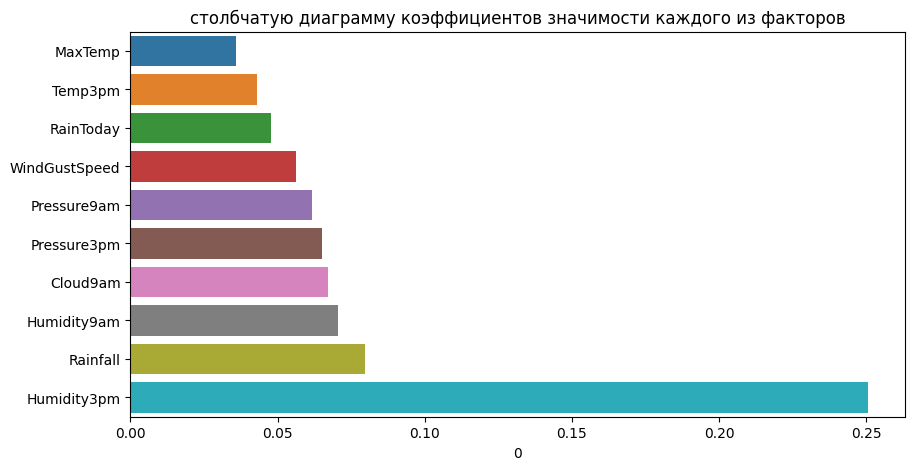

In [78]:
# temp=grid_search_rfc.best_estimator_.feature_importances_
temp=dtc.feature_importances_
df=pd.DataFrame(temp, index=X.columns)
df=df[0].sort_values().tail(10)

fig = plt.figure(figsize=(10, 5))
fig = sns.barplot(x=df,y=df.index)
# plt.xticks(rotation=45)
fig.set_title("столбчатую диаграмму коэффициентов значимости каждого из факторов")
# plt.show()

In [80]:
feature_names = [x for x in weather_data if x != 'RainTomorrow']
pd.DataFrame({'feat': feature_names,
              'coef': dtc.feature_importances_}).sort_values(by='coef', ascending=False)

,feat,coef
7,Humidity3pm,0.250783
2,Rainfall,0.079757
6,Humidity9am,0.070403
10,Cloud9am,0.067092
9,Pressure3pm,0.065272
...,...,...
50,Location_Newcastle,0.000000
62,Location_SalmonGums,0.000000
51,Location_Nhil,0.000000
52,Location_NorahHead,0.000000


In [81]:
feature_names

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuri